In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [2]:
import zipfile

In [7]:
base_dir = '../input/talkingdata-mobile-user-demographics'
event_dir = os.path.join(base_dir, 'events.csv.zip')

In [8]:
with zipfile.ZipFile(event_dir,'r') as z:
    z.extractall()

In [15]:
df_events = pd.read_csv("./events.csv", dtype={'device_id':np.str})
df_events.head()

(3252950, 5)

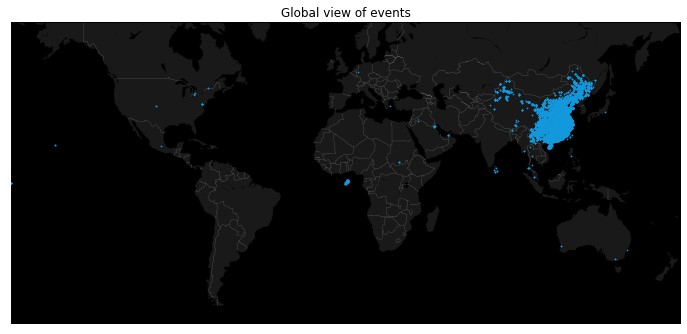

In [13]:
df_events_sample = df_events.sample(n=100000)
plt.figure(1, figsize = (12, 6))

m1 = Basemap(projection='merc', llcrnrlat = -60, urcrnrlat = 65,
            llcrnrlon = -180, urcrnrlon = 180, lat_ts = 0, resolution = 'c')
m1.fillcontinents(color='#191919', lake_color = '#000000')
m1.drawmapboundary(fill_color = '#000000')
m1.drawcountries(linewidth = 0.1, color = 'w')

mxy = m1(df_events_sample['longitude'].tolist(), df_events_sample['latitude'].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c='#1298db', lw = 0, alpha = 1, zorder=5)
plt.title('Global view of events')
plt.show()

In [17]:
df_at0 = df_events[(df_events['longitude']==0) & (df_events['latitude'] == 0)]
df_near0 = df_events[(df_events['longitude'] > -1) &
                    (df_events['longitude'] < 1) &
                    (df_events['latitude'] > -1) &
                    (df_events['latitude'] < 1)]

print('# events:', len(df_events))
print('# at (0, 0):', len(df_at0))
print('# near(0, 0):', len(df_near0))

# events: 3252950
# at (0, 0): 968675
# near(0, 0): 969871


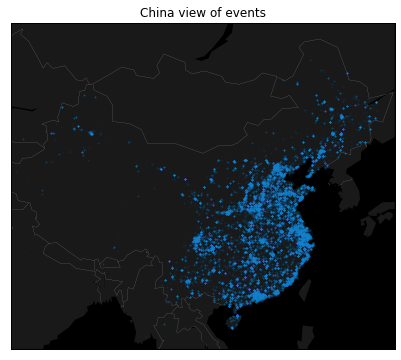

In [24]:
lon_min, lon_max = 75, 135
lat_min, lat_max = 15, 55

idx_china = (df_events['longitude']>lon_min) &\
            (df_events['longitude']<lon_max) &\
            (df_events['latitude']>lat_min) &\
            (df_events['latitude']<lat_max)

df_events_china = df_events[idx_china].sample(n=100000)

plt.figure(2, figsize=(12,6))

m2 = Basemap(projection='merc', llcrnrlat=lat_min, urcrnrlat=lat_max, llcrnrlon=lon_min, urcrnrlon=lon_max, lat_ts=35)
m2.fillcontinents(color='#191919', lake_color='#000000')
m2.drawmapboundary(fill_color='#000000')
m2.drawcountries(linewidth=0.1, color='w')

mxy = m2(df_events_china['longitude'].tolist(), df_events_china['latitude'].tolist())
m2.scatter(mxy[0], mxy[1], s=5, c='#1292db', lw=0, alpha=0.05, zorder=5)

plt.title('China view of events')
plt.show()

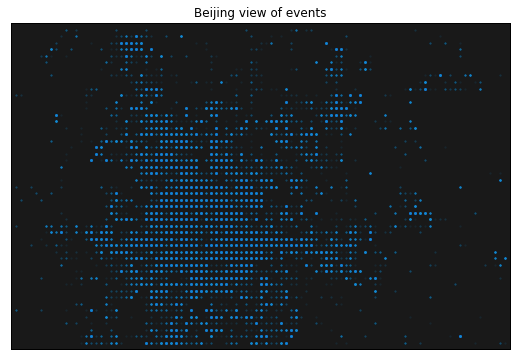

In [29]:
lon_min, lon_max = 116, 117
lat_min, lat_max = 39.75, 40.25

idx_beijing = (df_events['longitude']>lon_min) &\
                (df_events['longitude']<lon_max) &\
                (df_events['latitude']>lat_min) &\
                (df_events['latitude']<lat_max)
df_events_beijing = df_events[idx_beijing]

plt.figure(3, figsize=(12, 6))
m3 = Basemap(projection='merc', llcrnrlat=lat_min, urcrnrlat = lat_max, llcrnrlon=lon_min, urcrnrlon = lon_max, lat_ts=35, resolution='c')
m3.fillcontinents(color='#191919', lake_color='#000000')
m3.drawmapboundary(fill_color='#000000')
m3.drawcountries(linewidth=0.1, color='w')

mxy = m3(df_events_beijing['longitude'].tolist(), df_events_beijing['latitude'].tolist())
m3.scatter(mxy[0], mxy[1], s=5, c='#1292db', lw=0, alpha = 0.1, zorder = 5)

plt.title('Beijing view of events')
plt.show()

In [30]:
train_dir = os.path.join(base_dir, 'gender_age_train.csv.zip')

In [31]:
with zipfile.ZipFile(train_dir, 'r') as z:
    z.extractall()

In [32]:
df_train = pd.read_csv("./gender_age_train.csv", dtype={'device_id':np.str})

df_plot = pd.merge(df_train, df_events_beijing, on = 'device_id', how = 'inner')

df_m = df_plot[df_plot['gender'] == 'M']
df_f = df_plot[df_plot['gender'] == 'F']

Text(0.5, 1.0, 'Female events in Beijing')

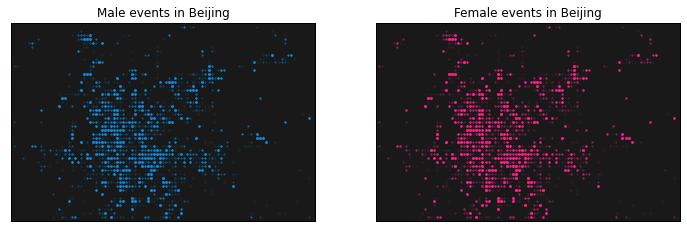

In [37]:
plt.figure(4, figsize = (12, 6))
plt.subplot(121)
m4a = Basemap(projection = 'merc', llcrnrlat = lat_min, urcrnrlat = lat_max, llcrnrlon = lon_min, urcrnrlon = lon_max, lat_ts = 35, resolution = 'c')
m4a.fillcontinents(color = '#191919', lake_color = '#000000')
m4a.drawmapboundary(fill_color = '#000000')
m4a.drawcountries(linewidth = 0.1, color = 'w')

mxy = m4a(df_m['longitude'].tolist(), df_m['latitude'].tolist())
m4a.scatter(mxy[0], mxy[1], s = 5, c = '#1292db', lw = 0, alpha = 0.1, zorder = 5)
plt.title('Male events in Beijing')

plt.subplot(122)
m4b = Basemap(projection = 'merc', llcrnrlat = lat_min, urcrnrlat = lat_max, llcrnrlon = lon_min, urcrnrlon = lon_max, lat_ts = 35, resolution = 'c')
m4b.fillcontinents(color = '#191919', lake_color = '#000000')
m4b.drawmapboundary(fill_color = '#000000')
m4b.drawcountries(linewidth = 0.1, color = 'w')

mxy = m4b(df_m['longitude'].tolist(), df_m['latitude'].tolist())
m4b.scatter(mxy[0], mxy[1], s = 5, c = '#fd3096', lw = 0, alpha = 0.1, zorder = 5)
plt.title('Female events in Beijing')

In [38]:
print('# M obs:', len(df_m))
print('# F obs:', len(df_f))

# M obs: 29948
# F obs: 13630


In [39]:
df_plot['lon_round'] = df_plot['longitude'].round(decimals = 2)
df_plot['lat_round'] = df_plot['latitude'].round(decimals = 2)

df_age = pd.pivot_table(df_plot, values = 'age', index = 'lon_round',
                       columns = 'lat_round', aggfunc = np.mean)

df_cnt = pd.pivot_table(df_plot, values = 'age', index = 'lon_round',
                       columns = 'lat_round', aggfunc = 'count')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not b

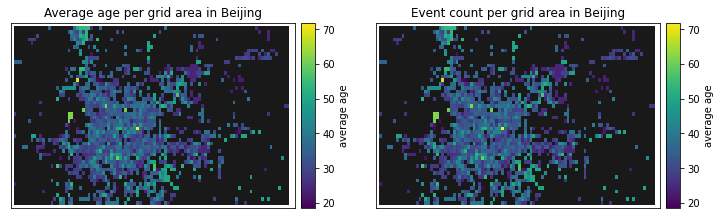

In [43]:
plt.figure(5, figsize = (12, 6))

plt.subplot(121)
m5a = Basemap(projection = 'merc', llcrnrlat = lat_min, urcrnrlat = lat_max, llcrnrlon = lon_min, urcrnrlon = lon_max, lat_ts = 35, resolution = 'c')
lons = df_age.index.values
lats = df_age.columns.values
x, y = np.meshgrid(lons, lats)
px, py = m5a(x, y)
data_values = df_age.values
masked_data = np.ma.masked_invalid(data_values.T)
cmap = plt.cm.viridis
cmap.set_bad(color = '#191919')

m5a.pcolormesh(px, py, masked_data, cmap = cmap, zorder = 5)
m5a.colorbar().set_label('average age')
plt.title('Average age per grid area in Beijing')

plt.subplot(122)
m5b = Basemap(projection = 'merc', llcrnrlat = lat_min, urcrnrlat = lat_max, llcrnrlon = lon_min, urcrnrlon = lon_max, lat_ts = 35, resolution = 'c')
lons = df_age.index.values
lats = df_age.columns.values
x, y = np.meshgrid(lons, lats)
px, py = m5b(x, y)
data_values = df_age.values
masked_data = np.ma.masked_invalid(data_values.T)
cmap = plt.cm.viridis
cmap.set_bad(color = '#191919')

m5b.pcolormesh(px, py, masked_data, cmap = cmap, zorder = 5)
m5b.colorbar().set_label('average age')
plt.title('Event count per grid area in Beijing')

plt.show()